In [1]:
#
#This Python 3 script takes as an input the CSV file from the Kaggle Breast Cancer Wisconsin Dataset (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
#This CSV file contains information on various features describing the size and shape of the nucleus.
#The measurements were made from digital images of a fine needle aspirate of a breast tissue mass.
#This output of this script is a prediction of whether a given sample is benign or malignant.
#
# Paul Mooney, October 2017

# Part One: 90% Accuracy with a Minimal Dataset
# Part Two: 95% Accuracy with the Full Dataset

# Jupyter Notebook: https://www.kaggle.com/paultimothymooney/predict-cancer-pandas-matplotlib-sklearn/



# The nucleus is an organelle present within all eukaryotic cells, including human cells.
# Abberant nuclear shape can be used to identify cancer cells (e.g. pap smear tests and the diagnosis of cervical cancer).
# Likewise, a growing body of literature suggests that there is some connection 
# between the shape of the nucleus and human disease states such as cancer and aging.
# As such, the quantitative analysis of nuclear size of shape has important biomedical applications.


# For more information, please refer to the following resources:
# http://www.uwyo.edu/levy_lab/
# Vukovic LD, Jevtic P, Edens LJ, Levy DL. (2016) New Insights into Mechanisms and Functions of Nuclear Size Regulation. Int Rev Cell Mol Biol. 322:1–59.
# Webster, M., Witkin, K.L., and Cohen-Fix, O. (2009). Sizing up the nucleus: nuclear shape, size and nuclear-envelope assembly. J. Cell Sci. 122, 1477–1486.
# Zink, D., Fischer, A.H., and Nickerson, J.A. (2004). Nuclear structure in cancer cells. Nat. Rev. Cancer 4, 677–687.



In [2]:


#################
#################
# Part One: 90% Accuracy with a Minimal Dataset
#################
#################



# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Next I need to set my current working directory to the folder that contains the relevant CSV files.
# These data files were downloaded from https://www.kaggle.com/uciml/breast-cancer-wisconsin-data.
import os
#os.chdir('/Users/ptm/desktop/Current_working_directory')
# We will begin by loading the relevant data.
#trainingData = pd.read_csv('data.csv')
trainingData = pd.read_csv('../input/data.csv')

# Next we will inspect the data.  We will print the names of each column.

def printColumnTitles(input):
    """ 
    This function takes as an input a dataframe containing columns.  
    The output is the name of each column;
    """  
    
    print('')
    print('Column Values:')
    print('')
    print(input.columns.values)
    print('')
    return
printColumnTitles(trainingData)



Column Values:

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean' 'radius_se'
 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se' 'compactness_se'
 'concavity_se' 'concave points_se' 'symmetry_se' 'fractal_dimension_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']



In [3]:

# Some of these columns are redundant.  For the sake of simplicity, I am going to delete most of the columns.  Don't worry, I'lll add them back later.


trainingData = trainingData.drop(['id', 'radius_mean', 'perimeter_mean',
 'compactness_mean', 'fractal_dimension_mean', 'radius_se',
 'texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se',
 'concavity_se', 'concave points_se', 'fractal_dimension_se',
 'radius_worst', 'texture_worst', 'perimeter_worst',
 'smoothness_worst', 'compactness_worst', 'concavity_worst',
 'concave points_worst', 'fractal_dimension_worst', 'Unnamed: 32', 'area_se', 'symmetry_se',
 'area_worst', 'symmetry_worst', 'concavity_mean'], axis=1)

    

# These are the new column values after simplification.    
    

def describeDataAgain(input):
    """ 
    The output of this function is a description of the dataframe input.
    """ 
    
    print('')
    print('New summary of data after making changes:')
    print('')
    print('Column Values:')
    print('')
    print(input.columns.values)
    print('')
    print('First Few Values:')
    print('')
    print(input.head())
    print('')
    print('Null Value Counts:')
    print('')
    print(input.isnull().sum())
    return

describeDataAgain(trainingData)



New summary of data after making changes:

Column Values:

['diagnosis' 'texture_mean' 'area_mean' 'smoothness_mean'
 'concave points_mean' 'symmetry_mean']

First Few Values:

  diagnosis  texture_mean  area_mean  smoothness_mean  concave points_mean  \
0         M         10.38     1001.0          0.11840              0.14710   
1         M         17.77     1326.0          0.08474              0.07017   
2         M         21.25     1203.0          0.10960              0.12790   
3         M         20.38      386.1          0.14250              0.10520   
4         M         14.34     1297.0          0.10030              0.10430   

   symmetry_mean  
0         0.2419  
1         0.1812  
2         0.2069  
3         0.2597  
4         0.1809  

Null Value Counts:

diagnosis              0
texture_mean           0
area_mean              0
smoothness_mean        0
concave points_mean    0
symmetry_mean          0
dtype: int64


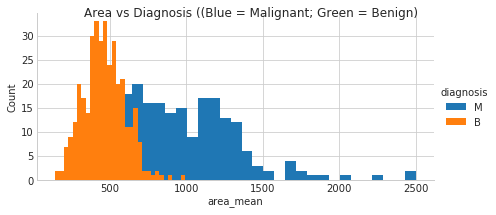

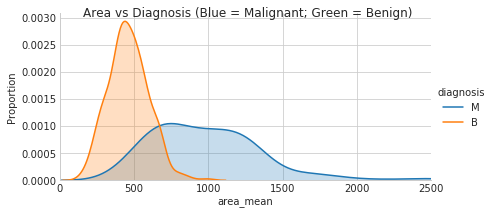

In [4]:


# Now let's plot some of that data.  I want to know if the nuclei from the malignant
# samples were larger than the nuclei from the benign samples.


  
def plotSizeDistribution(input):
    """ 
    Plot size distribution
    """  
    sns.set_style("whitegrid")
    distributionOne = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionOne.map(plt.hist, 'area_mean', bins=30)
    distributionOne.add_legend()
    distributionOne.set_axis_labels('area_mean', 'Count')
    distributionOne.fig.suptitle('Area vs Diagnosis ((Blue = Malignant; Green = Benign)')
    distributionTwo = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionTwo.map(sns.kdeplot,'area_mean',shade= True)
    distributionTwo.set(xlim=(0, input['area_mean'].max()))
    distributionTwo.add_legend()
    distributionTwo.set_axis_labels('area_mean', 'Proportion')
    distributionTwo.fig.suptitle('Area vs Diagnosis (Blue = Malignant; Green = Benign)')

    return

plotSizeDistribution(trainingData)


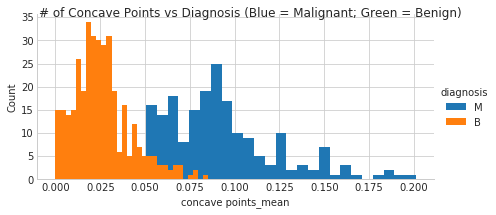

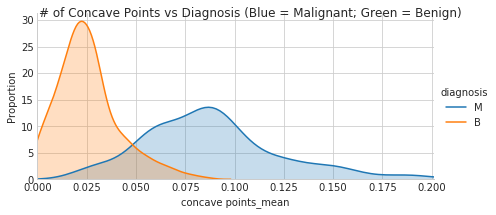

In [5]:


# This confirms my prediction that healthy nuclei have a default size
# and that cancer cells have a wide range of sizes, typically greater than the default size.
# Let's look at all of the features now.

  
def plotConcaveDistribution(input):
    """ 
    Plot concave distribution
    """  
    sns.set_style("whitegrid")
    distributionOne = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionOne.map(plt.hist, 'concave points_mean', bins=30)
    distributionOne.add_legend()
    distributionOne.set_axis_labels('concave points_mean', 'Count')
    distributionOne.fig.suptitle('# of Concave Points vs Diagnosis (Blue = Malignant; Green = Benign)')
    distributionTwo = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionTwo.map(sns.kdeplot,'concave points_mean',shade= True)
    distributionTwo.set(xlim=(0, input['concave points_mean'].max()))
    distributionTwo.add_legend()
    distributionTwo.set_axis_labels('concave points_mean', 'Proportion')
    distributionTwo.fig.suptitle('# of Concave Points vs Diagnosis (Blue = Malignant; Green = Benign)')

    return

plotConcaveDistribution(trainingData)



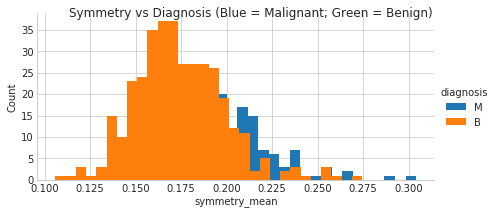

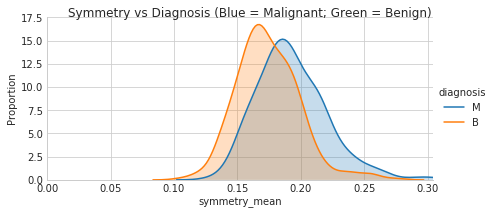

In [6]:

def plotSymmetryDistribution(input):
    """ 
    plot symmetry distribution
    """  
    sns.set_style("whitegrid")
    distributionOne = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionOne.map(plt.hist, 'symmetry_mean', bins=30)
    distributionOne.add_legend()
    distributionOne.set_axis_labels('symmetry_mean', 'Count')
    distributionOne.fig.suptitle('Symmetry vs Diagnosis (Blue = Malignant; Green = Benign)')
    distributionTwo = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionTwo.map(sns.kdeplot,'symmetry_mean',shade= True)
    distributionTwo.set(xlim=(0, input['symmetry_mean'].max()))
    distributionTwo.add_legend()
    distributionTwo.set_axis_labels('symmetry_mean', 'Proportion')
    distributionTwo.fig.suptitle('Symmetry vs Diagnosis (Blue = Malignant; Green = Benign)')

    return

plotSymmetryDistribution(trainingData)



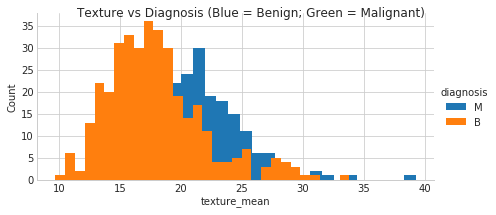

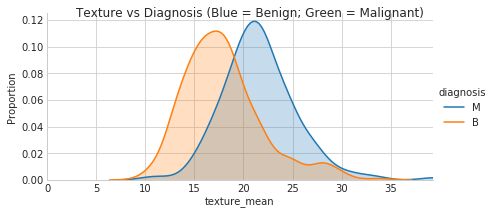

In [7]:

def plotTextureDistribution(input):
    """ 
    plot texture distribution
    """  
    sns.set_style("whitegrid")
    distributionOne = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionOne.map(plt.hist, 'texture_mean', bins=30)
    distributionOne.add_legend()
    distributionOne.set_axis_labels('texture_mean', 'Count')
    distributionOne.fig.suptitle('Texture vs Diagnosis (Blue = Benign; Green = Malignant)')
    distributionTwo = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionTwo.map(sns.kdeplot,'texture_mean',shade= True)
    distributionTwo.set(xlim=(0, input['texture_mean'].max()))
    distributionTwo.add_legend()
    distributionTwo.set_axis_labels('texture_mean', 'Proportion')
    distributionTwo.fig.suptitle('Texture vs Diagnosis (Blue = Benign; Green = Malignant)')

    return

plotTextureDistribution(trainingData)


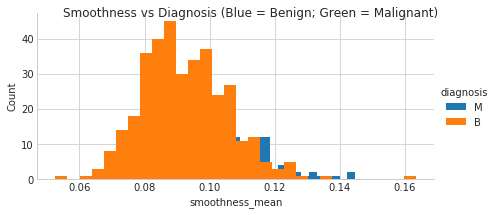

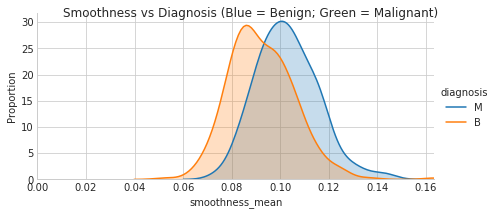

In [8]:

def plotSmoothnessDistribution(input):
    """ 
    plot smoothness distribution
    """  
    sns.set_style("whitegrid")
    distributionOne = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionOne.map(plt.hist, 'smoothness_mean', bins=30)
    distributionOne.add_legend()
    distributionOne.set_axis_labels('smoothness_mean', 'Count')
    distributionOne.fig.suptitle('Smoothness vs Diagnosis (Blue = Benign; Green = Malignant)')
    distributionTwo = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionTwo.map(sns.kdeplot,'smoothness_mean',shade= True)
    distributionTwo.set(xlim=(0, input['smoothness_mean'].max()))
    distributionTwo.add_legend()
    distributionTwo.set_axis_labels('smoothness_mean', 'Proportion')
    distributionTwo.fig.suptitle('Smoothness vs Diagnosis (Blue = Benign; Green = Malignant)')

    return

plotSmoothnessDistribution(trainingData)


In [9]:

# Next I will convert the categorical data to numerical form.

def diagnosisToBinary(input):
    """ 
    convert diagnosis to binary label
    """ 
    input["diagnosis"] = input["diagnosis"].astype("category")
    input["diagnosis"].cat.categories = [0,1]
    input["diagnosis"] = input["diagnosis"].astype("int")
    return

diagnosisToBinary(trainingData)    
    

# Next, I want to convert all continuous numerical data into values between 1 and 5
# Note that I decided where to begin each bin (categories 0 to 5) based on the previous distributions that we just plotted.
# By using values that are scaled between 1 and 5, it will help our classification algorithms.

def areaToCategory(input):
    """   
    The output is a modified dataframe where the area measurements are replaced with numbers between 
    zero and five based on their position within predetermined bins.
    """ 
    
    input['area_mean'] = input.area_mean.fillna(-0.5)
    bins = (-0.01, 250, 750, 1250, 2000, 10000)
    categories = pd.cut(input.area_mean, bins, labels=False)
    input.area_mean = categories
    return

areaToCategory(trainingData)



def concaveToCategory(input):
    """  
    The output is a modified dataframe where the shape measurements are replaced with numbers between 
    zero and five based on their position within predetermined bins.
    """ 
    # Get rid of the space in the file name
    cols = trainingData.columns
    cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, bytes)) else x)
    trainingData.columns = cols
    # Run the function
    input['concave_points_mean'] = input.concave_points_mean.fillna(-0.5)
    bins = (-0.01, 0.03, 0.06, 0.1, 1.0)
    categories = pd.cut(input.concave_points_mean, bins, labels=False)
    input.concave_points_mean = categories
    return

concaveToCategory(trainingData)


def symmetryToCategory(input):
    """ 
    The output is a modified dataframe where the shape measurements are replaced with numbers between 
    zero and five based on their position within predetermined bins.
    """ 
    
    input['symmetry_mean'] = input.symmetry_mean.fillna(-0.5)
    bins = (-0.01, 0.15, 0.17, 0.2, 1.0)
    categories = pd.cut(input.symmetry_mean, bins, labels=False)
    input.symmetry_mean = categories
    return

symmetryToCategory(trainingData)


def textureToCategory(input):
    """ 
    The output is a modified dataframe where the shape measurements are replaced with numbers between 
    zero and five based on their position within predetermined bins.
    """ 
    
    input['texture_mean'] = input.texture_mean.fillna(-0.5)
    bins = (-0.01, 10, 15, 19, 25, 100)
    categories = pd.cut(input.texture_mean, bins, labels=False)
    input.texture_mean = categories
    return

textureToCategory(trainingData)

def smoothnessToCategory(input):
    """ 
    The output is a modified dataframe where the shape measurements are replaced with numbers between 
    zero and five based on their position within predetermined bins.
    """ 
    
    input['smoothness_mean'] = input.smoothness_mean.fillna(-0.5)
    bins = (-0.01, 0.07, 0.09, 0.11, .13, 1)
    categories = pd.cut(input.smoothness_mean, bins, labels=False)
    input.smoothness_mean = categories
    return

smoothnessToCategory(trainingData)

# Now this is what our new data looks like:

describeDataAgain(trainingData)




New summary of data after making changes:

Column Values:

['diagnosis' 'texture_mean' 'area_mean' 'smoothness_mean'
 'concave_points_mean' 'symmetry_mean']

First Few Values:

   diagnosis  texture_mean  area_mean  smoothness_mean  concave_points_mean  \
0          1             1          2                3                    3   
1          1             2          3                1                    2   
2          1             3          2                2                    3   
3          1             3          1                4                    3   
4          1             1          3                2                    3   

   symmetry_mean  
0              3  
1              2  
2              3  
3              3  
4              2  

Null Value Counts:

diagnosis              0
texture_mean           0
area_mean              0
smoothness_mean        0
concave_points_mean    0
symmetry_mean          0
dtype: int64


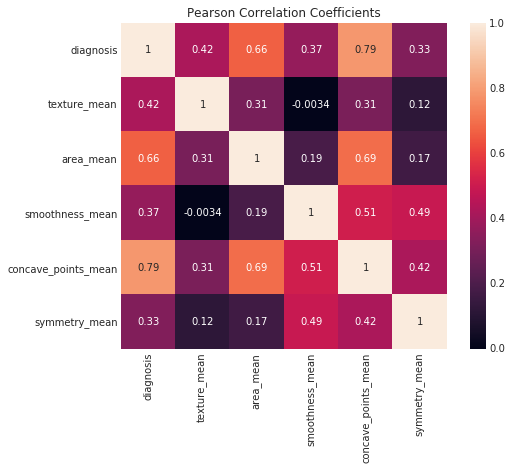

In [10]:


# Now I will look at all of the variables together, using a heatmap.


def makeAHeatMap(input):
    """ 
    The output is a heatmap showing the relationship between each numerical feature; 
    """  
    
    plt.figure(figsize=[8,6])
    heatmap = sns.heatmap(input.corr(), vmax=1.0, square=True, annot=True)
    heatmap.set_title('Pearson Correlation Coefficients')

    return
    
makeAHeatMap(trainingData)


In [11]:

# Here with this heatmap we can see that big, mis-shapen nuclei are typicaly from cancerous samples.
# Let's explore that in more detail.



def pivotTheData(input):
    """ 
    The output is a couple of pivot tables showing the relationship between these selected features.
    """    
    
    print('')
    print('Pivot Tables:')
    print('')
    print(input[["area_mean", "diagnosis"]].groupby(['area_mean'], as_index=False).mean().sort_values(by='diagnosis', ascending=False))
    print('')
    print(input[["concave_points_mean", "diagnosis"]].groupby(['concave_points_mean'], as_index=False).mean().sort_values(by='diagnosis', ascending=False))
    print('')
    print(input[['symmetry_mean', 'diagnosis']].groupby(['symmetry_mean'], as_index=False).mean().sort_values(by='diagnosis', ascending=False))
    print('')
    print(input[['texture_mean', 'diagnosis']].groupby(['texture_mean'], as_index=False).mean().sort_values(by='diagnosis', ascending=False))
    print('')
    print(input[['smoothness_mean', 'diagnosis']].groupby(['smoothness_mean'], as_index=False).mean().sort_values(by='diagnosis', ascending=False))
    print('')
    return

pivotTheData(trainingData)



Pivot Tables:

   area_mean  diagnosis
3          3   1.000000
4          4   1.000000
2          2   0.935780
1          1   0.170426
0          0   0.000000

   concave_points_mean  diagnosis
3                    3   1.000000
2                    2   0.879032
1                    1   0.284615
0                    0   0.027344

   symmetry_mean  diagnosis
3              3   0.603448
2              2   0.412955
1              1   0.238095
0              0   0.084746

   texture_mean  diagnosis
3             3   0.598174
4             4   0.571429
2             2   0.221675
1             1   0.044444
0             0   0.000000

   smoothness_mean  diagnosis
4                4   0.750000
3                3   0.641026
2                2   0.447183
1                1   0.154255
0                0   0.000000



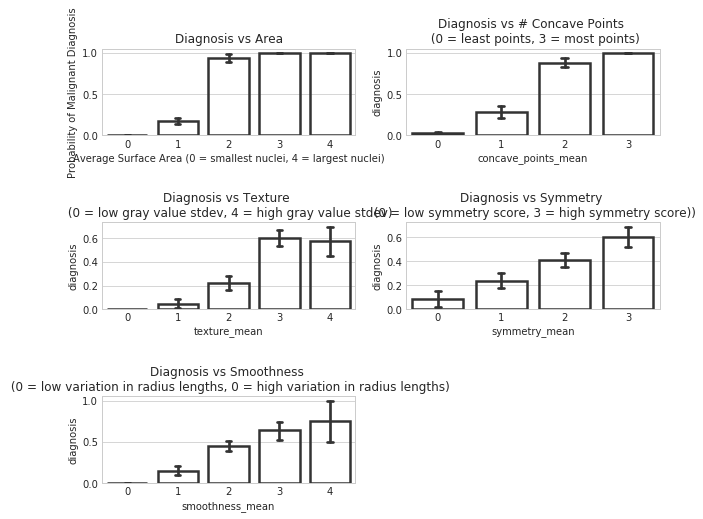

In [12]:

def plotTheData(input):
    """ 
    The output is a bunch of bar graphs illustrating the relationships between certain features.
    """  
    
    fig = plt.figure(figsize=[10,8])
    fig.subplots_adjust(hspace=1.0)
    plt.subplot(321)
    plotOne = sns.barplot('area_mean', 'diagnosis', data=input, capsize=.1, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
    plotOne.set_title('Diagnosis vs Area')
    plotOne.set(xlabel='Average Surface Area (0 = smallest nuclei, 4 = largest nuclei)', ylabel='Probability of Malignant Diagnosis')
    plt.subplot(322)
    plotTwo = sns.barplot('concave_points_mean', 'diagnosis', data=input, capsize=.1, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
    plotTwo.set_title('Diagnosis vs # Concave Points \n (0 = least points, 3 = most points)')
    plt.subplot(323)
    plotTwo = sns.barplot('texture_mean', 'diagnosis', data=input, capsize=.1, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
    plotTwo.set_title('Diagnosis vs Texture \n (0 = low gray value stdev, 4 = high gray value stdev)')
    plt.subplot(324)
    plotTwo = sns.barplot('symmetry_mean', 'diagnosis', data=input, capsize=.1, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
    plotTwo.set_title('Diagnosis vs Symmetry \n (0 = low symmetry score, 3 = high symmetry score))') 
    plt.subplot(325)
    plotTwo = sns.barplot('smoothness_mean', 'diagnosis', data=input, capsize=.1, linewidth=2.5, facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2")
    plotTwo.set_title('Diagnosis vs Smoothness \n (0 = low variation in radius lengths, 0 = high variation in radius lengths)') 
plotTheData(trainingData)


In [13]:

# Great!  This means that our classification algorithms should have something
# good to work with.  Next we will identify a suitable classification algorithm
# that we can use to predict whether or not a given sample is malignant.



# To do this, we will import some additional Python libraries that contain
# methods and algorithms that are helpful for machine learning applications.

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

#from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# We will need to split up our training data, setting aside 20%
# of the training data for cross-validation testing, such that we can avoid
# potentially overfitting the data.
X_train = 0
X_test = 0
Y_train = 0
Y_test = 0
xValues = trainingData.drop(['diagnosis'], axis=1)
yValues = trainingData['diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2, random_state=23)
# The train_test_split function is important for cross-validation
# Learn more about this important concept at the following links:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation



Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.940152 (0.065735)
RF: 0.921212 (0.061190)
KNN: 0.949242 (0.067083)
SVM: 0.949242 (0.067083)
LSVM: 0.931818 (0.073058)
GNB: 0.931818 (0.073058)
DTC: 0.921970 (0.058882)
GBC: 0.905303 (0.058018)


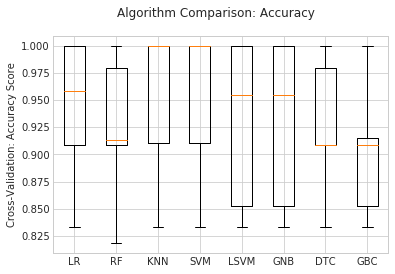


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
GBC = GradientBoostingClassifier



In [14]:

# There are a lot of different classification algorithms to choose between.
# Let's compare nine of them.



def compareABunchOfDifferentModelsAccuracy(a, b, c, d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
    http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    """    
    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
        
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)

    
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return


compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)


def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('GBC = GradientBoostingClassifier')
    #print('LDA = LinearDiscriminantAnalysis')
    print('')
    return

defineModels()



In [15]:

## It looks like all nine of these algorithms can do a decent job at this classification task.
## Here we are looking at the "Accuracy Score".  But there is another metric called the F1
## score that does an even better job of comparing model performance.  Let's try that now.
## you can learn more about f1 scores at the following links:
##     http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
##    http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
#
#def compareABunchOfDifferentModelsF1Score(a,b,c,d):
#    """
#    compare performance of classifiers on X_train, X_test, Y_train, Y_test
#    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
#    http://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics
#    """   
#
#    print('')
#    print('Compare Multiple Classifiers:')
#    print('')
#    print('F1 Score:')
#    print('')
#    models = []
#    models.append(('LR', LogisticRegression()))
#    models.append(('RF', RandomForestClassifier()))
#    models.append(('KNN', KNeighborsClassifier()))
#    models.append(('SVM', SVC()))
#    models.append(('LSVM', LinearSVC()))
#    models.append(('GNB', GaussianNB()))
#    models.append(('DTC', DecisionTreeClassifier()))
#    models.append(('GBC', GradientBoostingClassifier()))
#    #models.append(('LDA', LinearDiscriminantAnalysis()))
#        
#    resultsF1 = []
#    names = []
#    for name, model in models:
#        model.fit(a, b)
#        kfold = model_selection.KFold(n_splits=10, random_state=7)
#        f1_results = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='f1_macro')
#        resultsF1.append(f1_results)
#        names.append(name)
#        f1Message = "%s: %f (%f)" % (name, f1_results.mean(), f1_results.std())
#        print(f1Message)
#        
#    fig = plt.figure()
#    fig.suptitle('Algorithm Comparison: F1 Score')
#    ax = fig.add_subplot(111)
#    plt.boxplot(resultsF1)
#    ax.set_xticklabels(names)
#    ax.set_ylabel('Cross-Validation: F1 Score')
#    plt.show()
#    return
#
#compareABunchOfDifferentModelsF1Score(X_train, Y_train, X_test, Y_test)
#defineModels()


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

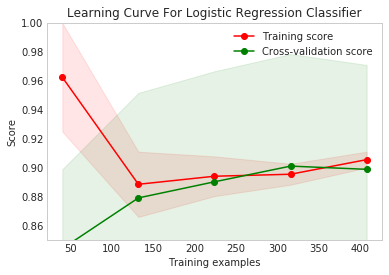

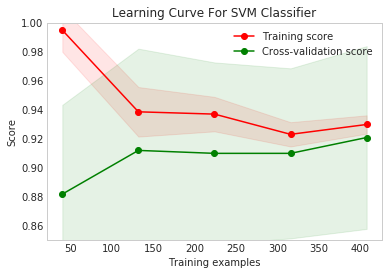

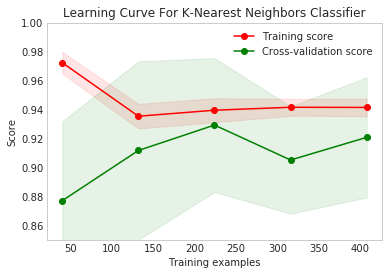

In [16]:


# Again, it looks like all nine algorithms do a pretty decent job.
# Let's look at three of them in more detail.
# Logistic Regression is my favorite algorithm, so let's look at that.
# I also like Support Vector Machines, so we will look at that as well.
# The K-Nearest Neighbors Classifier consistently had very good F1 scores.
# We'll look at the K-Nearest Neighbors Classifier as well.
# And finally, let's look at the LinearDiscriminantAnalysis Classifier as well.
# The way that we are going to further compare these four algorithms
# is by looking at the effect of the sample size on the accuracy score
# for both the training dataset and the cross-validation dataset.
# For more information about learning curves, read the following documentation: 
# http://scikit-learn.org/stable/modules/learning_curve.html




def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(LogisticRegression(), 'Learning Curve For Logistic Regression Classifier', X_train, Y_train, (0.85,1), 10)
plot_learning_curve(SVC(), 'Learning Curve For SVM Classifier', X_train, Y_train, (0.85,1), 10)
#plot_learning_curve(LinearDiscriminantAnalysis(), 'Learning Curve For LDA Classifier', X_train, Y_train, (0.85,1), 10)
plot_learning_curve(KNeighborsClassifier(), 'Learning Curve For K-Nearest Neighbors Classifier', X_train, Y_train, (0.85,1), 10)



In [17]:


# Great!  These learning curves were really informative.  It looks like maybe the 
# Logistic Regression and LDA are both overfitting the data.  And the K-Nearest Neighbor Classifier
# maybe needs an even larger sample size before the training curve and cross-validation
# curve are ready to converge.  It looks like maybe the Support Vector Machine
# algorithm is the best classifier to use for this application.  The learning curve
# you see here for the Support Vector Machine suggests that we do not suffer too much
# from either overfitting or bias.


# So now let's run the Support Vector Machine Classifier


# Optimize Parameters for SVM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

def selectParametersForSVM(a, b, c, d):
    """ Select Parameters for LR using SKlearn GridSearchCV function
    http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    http://scikit-learn.org/stable/modules/grid_search.html#grid-search"""
    model = SVC()
    parameters = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for SVM:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Support Vector Machine - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForSVM(X_train, Y_train, X_test, Y_test)



Selected Parameters for SVM:

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Support Vector Machine - Training set accuracy: 0.931060606061 (0.0508705211036)



In [18]:

# It looks like our model can predict with about 90% accuracty whether or not a given
# sample is malignant.  That is pretty good!


# Next, I will try using neural networks in an attempt to increase our accuracy.
# Before I do that, however, I am going to make the following transformations to the data:
# (1) Create Dummy Variables; (2) Perform Feature Selection; (3) Perform PCA trransformation


# Replace categorical with numerical
# implements the pd.get_dummies function to convert categorical columns to multiple binary columns
# Learn more about get_dummies and the advantages of binary data representation at the following link:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
trainingDataDummies = pd.get_dummies(trainingData, columns=['texture_mean', 'area_mean', 'smoothness_mean', 'concave_points_mean', 'symmetry_mean'])

# Eventually we will use neural networks.  For these algorithms, it is best to have data that is scaled.


# Describe the data
describeDataAgain(trainingDataDummies)



New summary of data after making changes:

Column Values:

['diagnosis' 'texture_mean_0' 'texture_mean_1' 'texture_mean_2'
 'texture_mean_3' 'texture_mean_4' 'area_mean_0' 'area_mean_1'
 'area_mean_2' 'area_mean_3' 'area_mean_4' 'smoothness_mean_0'
 'smoothness_mean_1' 'smoothness_mean_2' 'smoothness_mean_3'
 'smoothness_mean_4' 'concave_points_mean_0' 'concave_points_mean_1'
 'concave_points_mean_2' 'concave_points_mean_3' 'symmetry_mean_0'
 'symmetry_mean_1' 'symmetry_mean_2' 'symmetry_mean_3']

First Few Values:

   diagnosis  texture_mean_0  texture_mean_1  texture_mean_2  texture_mean_3  \
0          1               0               1               0               0   
1          1               0               0               1               0   
2          1               0               0               0               1   
3          1               0               0               0               1   
4          1               0               1               0               0 


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.929545 (0.065525)
RF: 0.920455 (0.063406)
KNN: 0.884848 (0.090896)
SVM: 0.838636 (0.099646)
LSVM: 0.894697 (0.083845)
GNB: 0.841667 (0.079198)
DTC: 0.885606 (0.041140)
GBC: 0.912879 (0.037460)


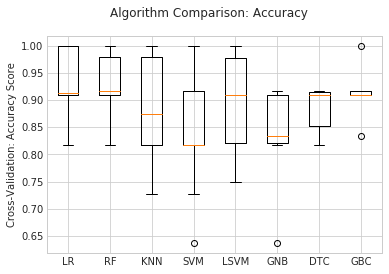


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
GBC = GradientBoostingClassifier



In [19]:

# Now we split the combined data back into training and testing data since we have finished with the feature engineering
# Split up the training data, setting aside 20%
# of the training data for cross-validation testing,
#X = trainingData.iloc[0:5000,1:] 
#y = trainingData.iloc[0:5000,:1] 
xValues = trainingDataDummies.drop(['diagnosis'], axis=1)
yValues = trainingDataDummies['diagnosis']
#yValues = y
# Here comes the important part
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2)
# The train_test_split function is important for cross-validation
# Learn more about this important concept at the following links:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

# Train and cross-validate multiple classification algorithms and compare the result
# Compare Classification Algorithms
compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)
defineModels()



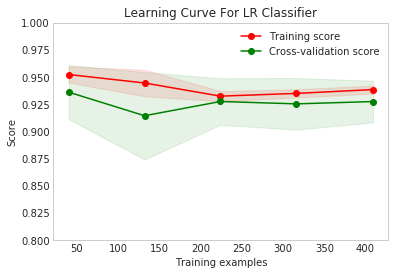

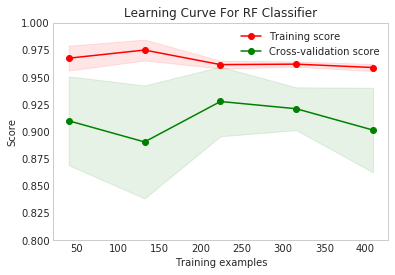

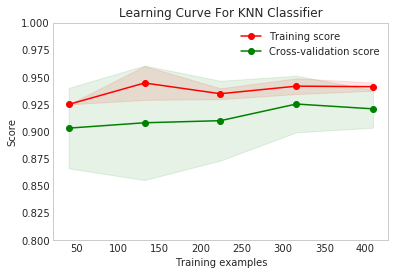

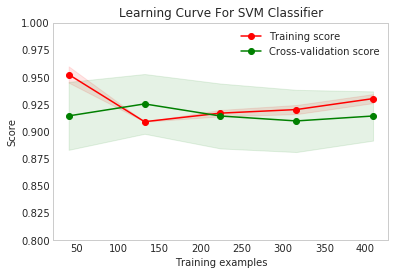

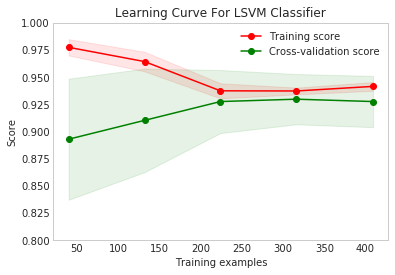

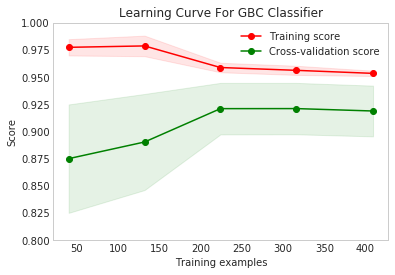

In [20]:


# Now let's plot a bunch of learning curves to see if we can find a method that does not overfit the data
# http://scikit-learn.org/stable/modules/learning_curve.html
def plotLotsOfLearningCurves(a,b):
    """Now let's plot a bunch of learning curves
    # http://scikit-learn.org/stable/modules/learning_curve.html
    """
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    #models.append(('GNB', GaussianNB()))
    #models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    
    for name, model in models:
        plot_learning_curve(model, 'Learning Curve For %s Classifier'% (name), a,b, (0.8,1), 10)
plotLotsOfLearningCurves(X_train, Y_train)


Optimal number of features : 23


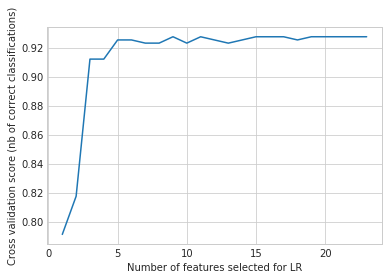

Optimal number of features : 9


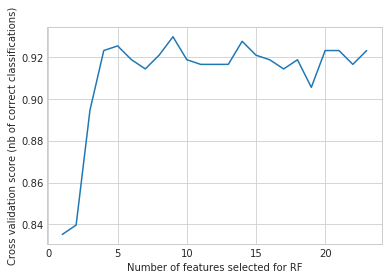

Optimal number of features : 7


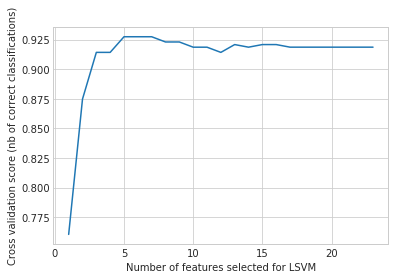

Optimal number of features : 19


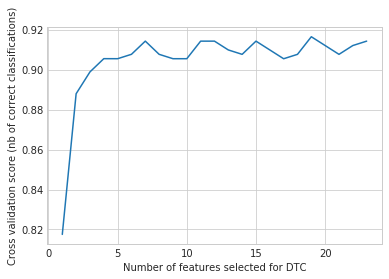

Optimal number of features : 16


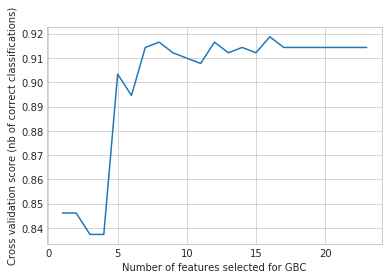

In [21]:

# Next I will do some feature selection

# How many features should I eliminate?

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

def determineOptimalFeatureNumber(a,b):
    """
    #http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
    """
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    #models.append(('KNN', KNeighborsClassifier()))
    #models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    #models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    
    for name, model in models:
        # Create the RFE object and compute a cross-validated score.
        currentModel = model
        # The "accuracy" scoring is proportional to the number of correct
        # classifications
        rfecv = RFECV(estimator=currentModel, step=1, cv=StratifiedKFold(2), scoring='accuracy')
        rfecv.fit(a,b)
        print("Optimal number of features : %d" % rfecv.n_features_)
        # Plot number of features VS. cross-validation scores
        plt.figure()
        plt.xlabel("Number of features selected for %s" % (name))
        plt.ylabel("Cross validation score (nb of correct classifications)")
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
        plt.show()

determineOptimalFeatureNumber(X_train, Y_train)


In [22]:

# Now we will eliminate all but the most helpful features
# We will do this by fitting a LinearSVC and then identifying the best coefficients
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer, accuracy_score
  
#Run LinearSVC
def runLinearSVC(a,b,c,d):
    """Run LinearSVC w/ Kfold CV"""
    model = LinearSVC()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('LinearSVC - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runLinearSVC(X_train, Y_train, X_test, Y_test)


# Identify best feature coefficients (coef_) and/or feature importance (feature_importances_)
model = LinearSVC()
model.fit(X_train,Y_train) # Needed to initialize coef_
columns = X_train.columns
coefficients = model.coef_.reshape(X_train.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('LinearSVC - Feature Importance:')
print('')
print(fullList)
print('')
# Remove all but the most helpful features
### Note that if I was worried about overfitting the training data I would eliminate a lot of features
### Right now I am not too worried about overfitting and would rather retain as much information as possible since it is all very relevant.
### As such I will limit us to 50 features, which ends up not eliminating any features at all.
topTwenty = fullList[:50]
featureList = topTwenty.values
featureList = pd.DataFrame(featureList)
featuresOnly = featureList[0]
featuresOnly = list(featuresOnly)
featuresOnly += ['diagnosis']
trainingDataDummies = trainingDataDummies[featuresOnly]
#g = sns.heatmap(trainingData[featuresOnly].corr(),cmap="BrBG",annot=False)

# Let's see if we improved our accuracy scores

# Split up the training data, setting aside 20%
# of the training data for cross-validation testing,
#X = trainingData.iloc[0:5000,1:] 
#y = trainingData.iloc[0:5000,:1] 
xValues = trainingDataDummies.drop(['diagnosis'], axis=1)
yValues = trainingDataDummies['diagnosis']
#yValues = y
# Here comes the important part
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2)
# The train_test_split function is important for cross-validation
# Learn more about this important concept at the following links:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

print('')
print('Dataset reduced to the following columns:')
print('')
print(X_train.columns)



LinearSVC - Training set accuracy: 0.894696969697 (0.0838448488441)

LinearSVC - Feature Importance:

                 Variable  absCoefficient
18  concave_points_mean_3        1.416166
15  concave_points_mean_0        1.191523
1          texture_mean_1        0.849981
7             area_mean_2        0.759735
4          texture_mean_4        0.667840
5             area_mean_0        0.618169
14      smoothness_mean_4        0.608459
8             area_mean_3        0.558549
6             area_mean_1        0.487808
3          texture_mean_3        0.471953
16  concave_points_mean_1        0.439183
17  concave_points_mean_2        0.426847
20        symmetry_mean_1        0.375863
11      smoothness_mean_1        0.329475
19        symmetry_mean_0        0.263621
22        symmetry_mean_3        0.170051
10      smoothness_mean_0        0.104660
2          texture_mean_2        0.077505
13      smoothness_mean_3        0.071234
21        symmetry_mean_2        0.069986
12      smoothne


After feature selection:

LinearSVC - Training set accuracy: 0.965151515152 (0.0427476847869)

After Feature Selection


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.964394 (0.043658)
RF: 0.946970 (0.057196)
KNN: 0.947727 (0.056737)
SVM: 0.972727 (0.041660)
LSVM: 0.965152 (0.042748)
GNB: 0.919697 (0.109689)
DTC: 0.955303 (0.044748)
GBC: 0.972727 (0.041660)


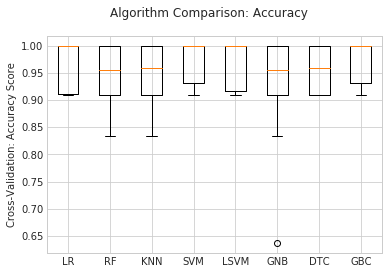


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
GBC = GradientBoostingClassifier



In [23]:

## See if the score of the Linear SVC improved after narrowing down the number of features
# Run LSVC
print('')
print('After feature selection:')
print('')
runLinearSVC(X_train, Y_train, X_test, Y_test)


# And now let's see how the other classification algorithms like the reduction in features
print('After Feature Selection')
print('')
compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)
defineModels()

#

In [24]:

###
###
###

## We want to use some linear classifiers, so we need to make sure that none of our features are too hgihly correlated
## First let's look at a heatmap of correlations between each feature
#
#g = sns.heatmap(X_train.corr(),cmap="BrBG",annot=False)
#
#
## Some of these features are highly correlated 
## This can cause problems for some algorithms such as linear classifiers
## As such, we will now transform our features to make them no longer be correlated
## this is done by applying a transformation and dimensionality reduction to the data
## this process is called principal component analysis (PCA)
## Fore more info, see the following documentaion:
## http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
## http://scikit-learn.org/stable/modules/decomposition.html#pca
##
#
## Now let's do a PCA to help with multicollinearity between the remaining features
#from sklearn.decomposition import PCA
## Minimum percentage of variance we want to be described by the resulting transformed components
#variance_pct = .99
## Create PCA object
#pca = PCA(n_components=variance_pct)
## Transform the initial features
#X_transformed = pca.fit_transform(xValues,yValues)
##X_transformedTest = pca.fit_transform(xValuesTest,y)
##testingData = testingData[X_transformedTest]
## Create a data frame from the PCA'd data
#pcaDataFrame = pd.DataFrame(X_transformed) 
##print(pcaDataFrame.shape[1], " components describe ", str(variance_pct)[1:], "% of the variance")
## Redefine X_train, X_test, Y_train, Y_test
#xValues = pcaDataFrame
#yValues = yValues
##yValues = y
## Here comes the important part
#X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2)
#
## Now we have new features (we transformed them) with new names
## There are fewer numbers of features now (dimensionality reduction)
## The features are no longer correlated, as illustrated below:
#
#g = sns.heatmap(X_train.corr(),cmap="BrBG",annot=False)
#
## Alternatively we could have done this:
### First We will eliminate anything with a correlation score greater than .5
##def correlation(dataset, threshold):
##    col_corr = set() # Set of all the names of deleted columns
##    corr_matrix = dataset.corr()
##    for i in range(len(corr_matrix.columns)):
##        for j in range(i):
##            if corr_matrix.iloc[i, j] >= threshold:
##                colname = corr_matrix.columns[i] # getting the name of column
##                col_corr.add(colname)
##                if colname in dataset.columns:
##                    del dataset[colname] # deleting the column from the dataset
##    print('')
##    print('Dataset reduced to the following columns:')
##    print('')
##    print(dataset.columns)
##
##correlation(X_train, 0.5)
##correlation(X_test, 0.5)
#
## Our newly transformed featuers are no longer correlated.
#
#
## See if the score of the LinearSVC improved after the Feature Selection + PCA
#
## Run LSVC
#print('')
#print('After feature selection + PCA:')
#print('')
#runLinearSVC(X_train, Y_train, X_test, Y_test)
#
## Run classifiers after PCA
#print('After Feature Selection + PCA')
#print('')
#compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)
#defineModels()
#
## Plot learning curve
#
#plot_learning_curve(LinearSVC(), 'Learning Curve For %s Classifier'% ('LinearSVC'), X_train, Y_train, (0.75,0.95), 10)
#plot_learning_curve(LogisticRegression(), 'Learning Curve For %s Classifier'% ('LogisticRegression'), X_train, Y_train, (0.75,0.95), 10)
#
## Those learning curves look great.

###
###
###


In [25]:

# Optimize Parameters for LSVC

# To select parameters, we use the functino grid_searchCV
# To learn more about this function, see the following documentation:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#http://scikit-learn.org/stable/modules/grid_search.html#grid-search

# Optimize Parameters for LSVM

def selectParametersForLSVM(a, b, c, d):
    """http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    http://scikit-learn.org/stable/modules/grid_search.html#grid-search"""
    model = LinearSVC()
    parameters = {'C': [0.00001, 0.001, .01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100, 1000]}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for LSVM:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Linear Support Vector Machine - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return
selectParametersForLSVM(X_train, Y_train, X_test, Y_test)



Selected Parameters for LSVM:

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Linear Support Vector Machine - Training set accuracy: 0.972727272727 (0.0416597790451)



In [26]:

# Let's also try running a few Neural Networks

# First we will use the Multi-layer Perceptron NN model from Sklearn
from sklearn.neural_network import MLPClassifier as MLPC
def runMLPC(a,b,c,d):
    classifier = MLPC(activation='relu', max_iter=1000)
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Multi-layer Perceptron NN - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runMLPC(X_train, Y_train,  X_test, Y_test)



SKlearn Multi-layer Perceptron NN - Training set accuracy: 0.973484848485 (0.0405497687608)



In [27]:

# Now let's see if we can improve the score with parameter optimization
# Optimize Parameters for MLP-NN

def selectParametersForMLPC(a, b, c, d):
    """http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    http://scikit-learn.org/stable/modules/grid_search.html#grid-search"""
    model = MLPC()
    parameters = {'verbose': [False],
                  'activation': ['logistic', 'relu'],
                  'max_iter': [1000, 2000], 'learning_rate': ['constant', 'adaptive']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for Multi-Layer Perceptron NN:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Multi-Layer Perceptron - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return

selectParametersForMLPC(X_train, Y_train,  X_test, Y_test)


Selected Parameters for Multi-Layer Perceptron NN:

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

SKlearn Multi-Layer Perceptron - Training set accuracy: 0.973484848485 (0.0405497687608)



In [28]:

# Now let's try some other neural networks
from __future__ import print_function
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# We will build some custom neural networks using keras
# https://keras.io/models/sequential/

def runTwoKerasClassifiers(a,b,c,d):
    """ Build and run Two different NNs using Keras"""
    global kerasModelOne, kerasModelTwo # eventually I should get rid of these global variables and use classes instead.  in this case i need these variables for the submission function.
    # Let's start out with a simple network consisting of only two fully connected layers.
    Adagrad(lr=0.00001, epsilon=1e-08, decay=0.0)
    model = Sequential()
    model.add(Dense(input_dim=np.array(a).shape[1], units=128, kernel_initializer='normal', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    model.fit(np.array(a), np.array(b), epochs=10, verbose=2, validation_split=0.2)
    score = model.evaluate(np.array(c),np.array(d), verbose=0)
    print('')
    print('Loss, Accuracy:')
    print(score)
    kerasModelOne = model  
    # Now let's make a new network, a deep network, that has 15 additional fully connected layers and also 15 dropout functions
    #RMSprop(lr=0.00001, rho=0.9, epsilon=1e-08, decay=0.0)
    Adagrad(lr=0.00001, epsilon=1e-08, decay=0.0)
    #Adadelta(lr=0.00001, rho=0.95, epsilon=1e-08, decay=0.0)
    model = Sequential()
    model.add(Dense(input_dim=np.array(a).shape[1], units=128,
                     kernel_initializer='normal', bias_initializer='zeros'))
    model.add(Activation('relu'))
    for i in range(0, 15):
        model.add(Dense(units=128, kernel_initializer='normal',
                         bias_initializer='zeros'))
        model.add(Activation('relu'))
        model.add(Dropout(.40))
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    print('Running Deep Neural Network: Expect Delays')
    model.fit(np.array(a), np.array(b), epochs=10, verbose=2, validation_split=0.2)
    score = model.evaluate(np.array(c),np.array(d), verbose=0)
    print('')
    print('Loss, Accuracy:')
    print(score)
    kerasModelTwo = model
    return kerasModelOne, kerasModelTwo
runTwoKerasClassifiers(X_train,Y_train,X_test,Y_test)


Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Train on 364 samples, validate on 91 samples
Epoch 1/10
0s - loss: 0.4536 - acc: 0.8379 - val_loss: 0.2765 - val_acc: 0.9231
Epoch 2/10
0s - loss: 0.2723 - acc: 0.9066 - val_loss: 0.2097 - val_acc: 0.9231
Epoch 3/10
0s - loss: 0.2316 - acc: 0.9121 - val_loss: 0.1911 - val_acc: 0.9121
Epoch 4/10
0s - loss: 0.2101 - acc: 0.9121 - val_loss: 0.1863 - val_acc: 0.9121
Epoch 5/10
0s - loss: 0.2005 - acc: 0.9286 - val_loss: 0.1865 - val_acc: 0.9121
Epoch 6/10
0s - loss: 0.1905 - acc: 0.9121 - val_loss: 0.2127 - val_acc: 0.9231
Epoch 7/10
0s - loss: 0.1901 - acc: 0.9203 - val_loss: 0.1755 - val_acc: 0.9121
Epoch 8/10
0s - loss: 0.1847 - acc: 0.9231 - val_loss: 0.1691 - val_acc: 0.9121
Epoch 9/10
0s - loss: 0.1797 - acc: 0.9286 - val_loss: 0.1709 - val_acc: 0.9121
Epoch 10/10
0s - loss: 0.1772 - acc: 0.9258 - val_loss: 0.1677 - val_acc: 0.9121

Loss, Accuracy:
[0.11190657284960412, 0.97368421052631582]
Running Deep Neural Network: Expect Delays
Train on 364 samples, validate on 91 samples
Epoch 

(<keras.models.Sequential at 0x7f6830fea128>,
 <keras.models.Sequential at 0x7f67c7f57a90>)

In [29]:

# To try to get an even higher score, I will now combine the MLPC and LSVC/SVM methods by using a new method called ensemble voting.
# It only works with Sklearn classifiers so that is why I did not include Keras.
# This new method should help to avoid overfitting by taking into consideration both MLPC and SVMs predictions.
# To learn more about the VotingClassifier function, see the following documentation:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
# http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier


from sklearn.ensemble import VotingClassifier

def runVotingClassifier(a,b,c,d):
    """http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
    http://scikit-learn.org/stable/modules/ensemble.html#voting-classifier"""
    global votingC, mean, stdev # eventually I should get rid of these global variables and use classes instead.  in this case i need these variables for the submission function.
    votingC = VotingClassifier(estimators=[('LSVM', LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
         intercept_scaling=1, loss='squared_hinge', max_iter=1000,
         multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
         verbose=0)), ('MLPC', MLPC(activation='logistic', alpha=0.0001, batch_size='auto',
           beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
           hidden_layer_sizes=(100,), learning_rate='constant',
           learning_rate_init=0.001, max_iter=2000, momentum=0.9,
           nesterovs_momentum=True, power_t=0.5, random_state=None,
           shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
           verbose=False, warm_start=False))], voting='hard')  
    votingC = votingC.fit(a,b)   
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(votingC, c,d, cv=kfold, scoring='accuracy')
    meanC = accuracy.mean() 
    stdevC = accuracy.std()
    print('Ensemble Voting Method - Training set accuracy: %s (%s)' % (meanC, stdevC))
    print('')
    return votingC, meanC, stdevC
runVotingClassifier(X_train,Y_train,X_test,Y_test)


Ensemble Voting Method - Training set accuracy: 0.790151515152 (0.145251199401)



(VotingClassifier(estimators=[('LSVM', LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0)), ('MLPC', MLPClassifier(activation='logistic', alpha=0.0001,...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
        verbose=False, warm_start=False))],
          flatten_transform=None, n_jobs=1, voting='hard', weights=None),
 0.79015151515151516,
 0.14525119940109404)

Confusion matrix, without normalization
[[70  1]
 [ 7 36]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.16  0.84]]


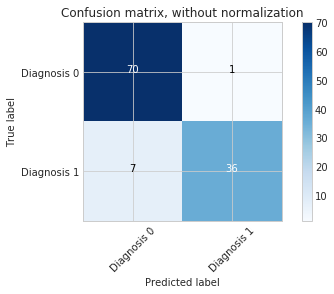

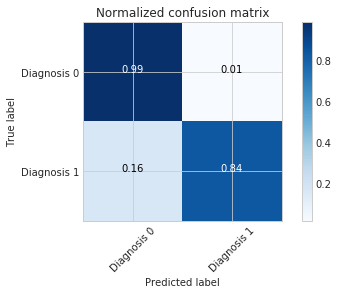

SKlearn Multi-layer Perceptron NN - Training set accuracy: 0.956060606061 (0.0440176940798)



In [30]:

# Now let's evaluate our predictions by making a confusion matrix
# To learn more about this confusion matrix, see the following documentation:
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# It looks like the Multi-Layer Perceptron NN was the best classifier.

# First Make a Prediction
from sklearn.metrics import confusion_matrix
import itertools
model = MLPC()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

# Now plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, prediction)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
class_names = ["Diagnosis 0", "Diagnosis 1"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


runMLPC(X_train, Y_train,  X_test, Y_test)



In [31]:


# 94.6% accuracy! Great!  But let's see if we can do even better.
# In the beginning of this approach I deleted most of columns of data to simplify the analysis.
# Now I will repeat the analysis using the full dataset.



#################
#################
# Part Two: 95% Accuracy with the Full Dataset
#################
#################



In [32]:


# Load the data
trainingData = pd.read_csv('../input/data.csv')
diagnosisToBinary(trainingData)    
xValues = trainingData.drop(['diagnosis', 'Unnamed: 32', 'id'], axis=1)
yValues = trainingData['diagnosis']
describeDataAgain(xValues)

# Previously we scaled our data between zero and five.
# We did this by making bins based off of the distribution profiles.
# This was helpful because it allowed us to extract information
# from the distribution profiles while making the bins.
# Now we have a lot more features, however, and it is no longer
# Practical to go plot each distribution profile and extrat
# five meaningful bins. Instead, we will scale all of the data 
# between zero and one by using SKlearn's "scale function"


# Scale the data
# Here I scale the xValues by subtracting by the mean and dividing by the stdev
# This gives us values that are centered around zero and this
# makes it easier for us to use certain classifiers.
from sklearn import preprocessing
xValuesScaled = preprocessing.scale(xValues)
xValuesScaled = pd.DataFrame(xValuesScaled, columns = xValues.columns)
describeDataAgain(xValuesScaled)



New summary of data after making changes:

Column Values:

['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean' 'radius_se'
 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se' 'compactness_se'
 'concavity_se' 'concave points_se' 'symmetry_se' 'fractal_dimension_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst']

First Few Values:

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29  


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.949242 (0.055778)
RF: 0.931061 (0.091692)
KNN: 0.939394 (0.066044)
SVM: 0.931818 (0.062838)
LSVM: 0.940152 (0.054149)
GNB: 0.958333 (0.055902)
DTC: 0.904545 (0.060150)
GBC: 0.913636 (0.066667)


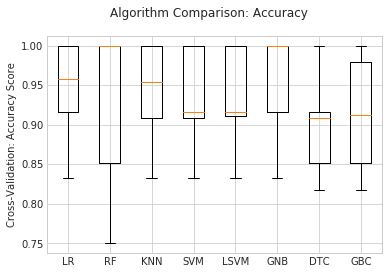

In [33]:

# Split data for cross-validation
# We will need to split up our training data, setting aside 20%
# of the training data for cross-validation testing, such that we can avoid
# potentially overfitting the data.
X_train, X_test, Y_train, Y_test = train_test_split(xValuesScaled, yValues, test_size=0.2, random_state=23)
# The train_test_split function is important for cross-validation
# Learn more about this important concept at the following links:
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)

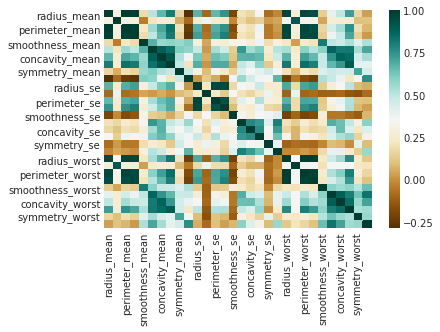

In [34]:

# We want to use some linear classifiers, so we need to make sure that none of our features are too hgihly correlated
# First let's look at a heatmap of correlations between each feature

g = sns.heatmap(X_train.corr(),cmap="BrBG",annot=False)



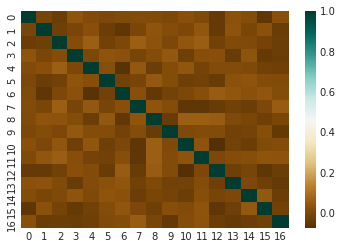

In [35]:

# Some of these features are highly correlated 
# This can cause problems for some algorithms such as linear classifiers
# As such, we will now transform our features to make them no longer be correlated
# this is done by applying a transformation and dimensionality reduction to the data
# this process is called principal component analysis (PCA)
# Fore more info, see the following documentaion:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# http://scikit-learn.org/stable/modules/decomposition.html#pca
#

# Now let's do a PCA to help with multicollinearity between the remaining features
from sklearn.decomposition import PCA
# Minimum percentage of variance we want to be described by the resulting transformed components
variance_pct = .99
# Create PCA object
pca = PCA(n_components=variance_pct)
# Transform the initial features
X_transformed = pca.fit_transform(xValuesScaled,yValues)
#X_transformedTest = pca.fit_transform(xValuesTest,y)
#testingData = testingData[X_transformedTest]
# Create a data frame from the PCA'd data
pcaDataFrame = pd.DataFrame(X_transformed) 
#print(pcaDataFrame.shape[1], " components describe ", str(variance_pct)[1:], "% of the variance")
# Redefine X_train, X_test, Y_train, Y_test
xValues = pcaDataFrame
yValues = yValues
#yValues = y
# Here comes the important part
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2)

# Now we have new features (we transformed them) with new names
# There are fewer numbers of features now (dimensionality reduction)
# The features are no longer correlated, as illustrated below:

g = sns.heatmap(X_train.corr(),cmap="BrBG",annot=False)


In [36]:

# See if the score of the LinearSVC improved after the Feature Selection + PCA

# Run LSVC
print('')
print('After feature selection + PCA:')
print('')
runLinearSVC(X_train, Y_train, X_test, Y_test)



After feature selection + PCA:

LinearSVC - Training set accuracy: 0.982575757576 (0.0348896331505)



After Feature Selection + PCA


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.991667 (0.025000)
RF: 0.936364 (0.071002)
KNN: 0.946970 (0.059459)
SVM: 0.956818 (0.043261)
LSVM: 0.982576 (0.034890)
GNB: 0.904545 (0.057914)
DTC: 0.823485 (0.135521)
GBC: 0.910606 (0.113879)


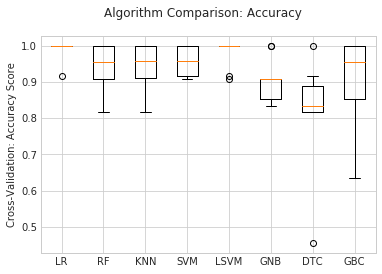


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
GBC = GradientBoostingClassifier



In [37]:

# Run classifiers after PCA
print('After Feature Selection + PCA')
print('')
compareABunchOfDifferentModelsAccuracy(X_train, Y_train, X_test, Y_test)
defineModels()


In [38]:
runMLPC(X_train, Y_train,  X_test, Y_test)


SKlearn Multi-layer Perceptron NN - Training set accuracy: 0.974242424242 (0.0393939393939)



In [39]:
runTwoKerasClassifiers(X_train,Y_train,X_test,Y_test)


Train on 364 samples, validate on 91 samples
Epoch 1/10
0s - loss: 0.3913 - acc: 0.9121 - val_loss: 0.2215 - val_acc: 0.9780
Epoch 2/10
0s - loss: 0.1910 - acc: 0.9725 - val_loss: 0.1572 - val_acc: 0.9780
Epoch 3/10
0s - loss: 0.1394 - acc: 0.9780 - val_loss: 0.1312 - val_acc: 0.9780
Epoch 4/10
0s - loss: 0.1120 - acc: 0.9780 - val_loss: 0.1193 - val_acc: 0.9780
Epoch 5/10
0s - loss: 0.0970 - acc: 0.9780 - val_loss: 0.1112 - val_acc: 0.9780
Epoch 6/10
0s - loss: 0.0858 - acc: 0.9780 - val_loss: 0.1057 - val_acc: 0.9780
Epoch 7/10
0s - loss: 0.0777 - acc: 0.9780 - val_loss: 0.1019 - val_acc: 0.9780
Epoch 8/10
0s - loss: 0.0723 - acc: 0.9780 - val_loss: 0.1009 - val_acc: 0.9780
Epoch 9/10
0s - loss: 0.0675 - acc: 0.9780 - val_loss: 0.0994 - val_acc: 0.9780
Epoch 10/10
0s - loss: 0.0635 - acc: 0.9780 - val_loss: 0.0987 - val_acc: 0.9780

Loss, Accuracy:
[0.071372025368506453, 0.98245613616809513]
Running Deep Neural Network: Expect Delays
Train on 364 samples, validate on 91 samples
Epoch

(<keras.models.Sequential at 0x7f6830b5ed68>,
 <keras.models.Sequential at 0x7f676812dfd0>)

Confusion matrix, without normalization
[[65  1]
 [ 0 48]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.    1.  ]]


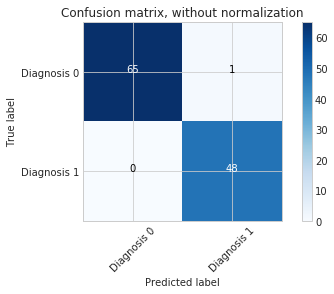

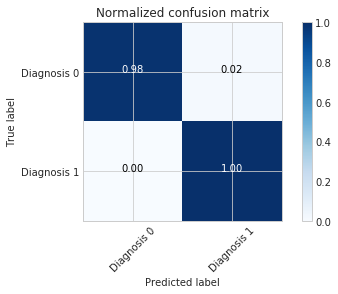

Logistic Regression - Training set accuracy: 0.991666666667 (0.025)



In [40]:

# It looks like the Logistic Regression is the best classifier.

# First Make a Prediction
from sklearn.metrics import confusion_matrix
import itertools
model = LogisticRegression()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

# Now plot the confusion matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, prediction)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
class_names = ["Diagnosis 0", "Diagnosis 1"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


#Run LR
def runLR(a,b,c,d):
    """Run LR w/ Kfold CV"""
    model = LogisticRegression()
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Logistic Regression - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runLR(X_train, Y_train, X_test, Y_test)


In [41]:
# 95% accuracy!  Great!  I think it is safe to say that we can accurately predict
# the diagnosis for most any given patient.







# To produce a new CSV document containing your predictions based off 
# of nuclear shape measurements contained in test.csv, see the following code:

# Submission with Ensemble Voting Classification Method

## Load testing Data (to extract PassengerID Only)
#testingData2 = pd.read_csv('test.csv')
## Define Model, Predict, Submitmodel = votingC
#model = votingC
#model.fit(X_train, Y_train)
#prediction = model.predict(testingData)
#prediction = prediction.astype(int)
#submission = pd.DataFrame({
#    "PassengerId": testingData2["PassengerId"],
#    "Survived": prediction})
#submission.to_csv('_new_submission_ensemble.csv', index=False)
#
## to finish the submission process, upload the file '_new_submission_.csv' to Kaggle
#
#
##_Alternative Submission for Keras
#
## Re-Load testing Data (to extract PassengerID Only)
#testingData2 = pd.read_csv('test.csv')
## Define Model, Predict, Submit
#model = kerasModelTwo
#model.fit(np.array(X_train), np.array(Y_train), epochs=50, verbose=2, validation_split=0.2)
#prediction = model.predict_classes(np.array(testingData))
#submission = pd.DataFrame({"PassengerId": testingData2["PassengerId"], "Survived": prediction.flatten()})
#submission.to_csv('_new_submission_Keras.csv', index=False)
#
## to finish the submission process, upload the file '_new_submission_.csv' to Kaggle
#
## Submission with LinearSVC
#
## Load testing Data (to extract PassengerID Only)
#testingData2 = pd.read_csv('test.csv')
## Define Model, Predict, Submitmodel = votingC
#model = LinearSVC(C=0.0001, class_weight=None, dual=True, fit_intercept=True,intercept_scaling=1, loss='squared_hinge', max_iter=1000,multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,verbose=0)
#model.fit(X_train, Y_train)
#prediction = model.predict(testingData)
#prediction = prediction.astype(int)
#submission = pd.DataFrame({
#    "PassengerId": testingData2["PassengerId"],
#    "Survived": prediction})
#submission.to_csv('_new_submission_LinearSVC.csv', index=False)
#
## to finish the submission process, upload the file '_new_submission_.csv' to Kaggle
#